In [164]:
#Import Lib
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

from tensorflow.keras.layers import Dense, LSTM, RNN, Embedding, Dropout
from tensorflow.keras.models import Sequential

from keras.backend import clear_session

import os

In [165]:
df = pd.read_csv(r'D:/Users/Desktop/Scientific-research/Deep learning/Data/Android-malware/drebin-215-dataset-5560malware-9476-benign.csv')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_8812\2343203276.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:/Users/Desktop/Scientific-research/Deep learning/Data/Android-malware/drebin-215-dataset-5560malware-9476-benign.csv')


In [166]:
df.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [167]:
print("Total missing values: ", sum(list(df.isna().sum())))

Total missing values:  0


In [168]:
df = df.dropna()

In [169]:
#Pretrain dataset
def preprocess(dataframe):
    dataframe.loc[dataframe['class'] == "B", "class"] = 0
    dataframe.loc[dataframe['class'] == "S", "class"] = 1

    return dataframe

In [170]:
df = df.replace('[?]', np.NAN, regex=True)
print("Total missing values: ", sum(list(df.isna().sum())))
df.dropna(inplace=True)

Total missing values:  5


In [171]:
scaled_train = preprocess(df)

X = scaled_train.drop(['class'], axis=1).values
y = scaled_train['class'].values

#Reduce dim
pca = PCA(n_components=20)
pca = pca.fit(X)
X_reduced = pca.transform(X)

# Convert labels to integers
y = y.astype('int')

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [172]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [173]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12024, 215)
(3007, 215)
(12024,)
(3007,)


In [174]:
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12024, 215)
(3007, 215)
(12024, 1)
(3007, 1)


In [175]:
model = Sequential()
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(Dense(units=16))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 32)                4352      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Compile models
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=50, batch_size=32,
                    validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

Epoch 1/50
376/376 [==============================] - 6s 13ms/step - loss: 0.6625 - accuracy: 0.6259 - val_loss: 0.6533 - val_accuracy: 0.6412
Epoch 2/50
376/376 [==============================] - 4s 12ms/step - loss: 0.6613 - accuracy: 0.6277 - val_loss: 0.6547 - val_accuracy: 0.6412
Epoch 3/50
376/376 [==============================] - 4s 11ms/step - loss: 0.6605 - accuracy: 0.6277 - val_loss: 0.6550 - val_accuracy: 0.6412
Epoch 4/50
376/376 [==============================] - 4s 11ms/step - loss: 0.6606 - accuracy: 0.6277 - val_loss: 0.6528 - val_accuracy: 0.6412
Epoch 5/50
376/376 [==============================] - 4s 11ms/step - loss: 0.6607 - accuracy: 0.6277 - val_loss: 0.6548 - val_accuracy: 0.6412
Epoch 6/50
376/376 [==============================] - 4s 11ms/step - loss: 0.6604 - accuracy: 0.6277 - val_loss: 0.6529 - val_accuracy: 0.6412
Epoch 7/50
376/376 [==============================] - 4s 11ms/step - loss: 0.6602 - accuracy: 0.6277 - val_loss: 0.6540 - val_accuracy: 0.6412

In [177]:
# Predicted values
y_pred = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
y_pred = (y_pred > 0.5)

print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

94/94 [==============================] - 1s 4ms/step
Confusion matrix: [[1840   88]
 [ 131  948]]
Accuracy: 0.9271699368141004
Precision: 0.915057915057915
Recall: 0.8785912882298424
F1 Score: 0.8964539007092198


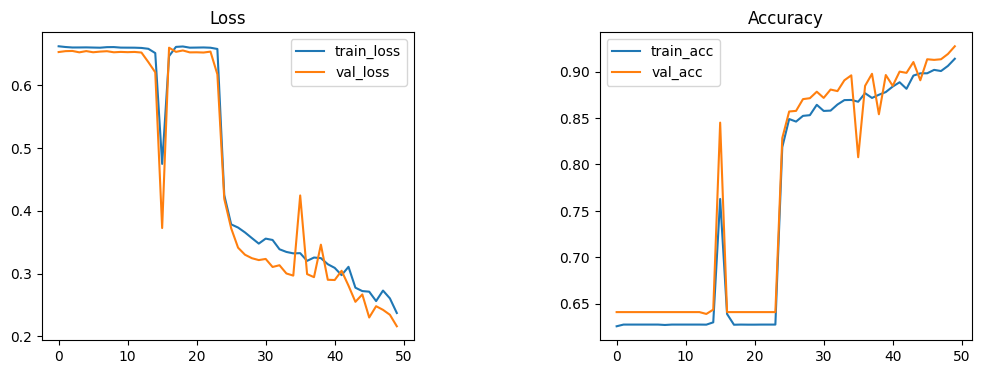

In [178]:
# Draw chart
import matplotlib.pyplot as plt

# Lấy ra các giá trị loss và accuracy từ history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Vẽ biểu đồ
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].plot(train_loss, label='train_loss')
ax[0].plot(val_loss, label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='train_acc')
ax[1].plot(val_acc, label='val_acc')
ax[1].set_title('Accuracy')
ax[1].legend()

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.5)

plt.show()